In [1]:
import os
import time
import pickle
import random

import torch
import numpy as np
import matplotlib as mpl

from utilities import *
from metrics import *
from pneumonia_dataset import load_data
from unet import LeakyUNET, BCEWithLogitLoss2D
from experiment import *

Box thresh: 0.1
Prediction mask scale: 3.2400673e-23 - 0.4345214
Prediction string: 
Ground truth boxes: [[166, 97, 62, 97]]
Average precision image: 0.00000


/nfs01/shared_software/anaconda3/envs/gia/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


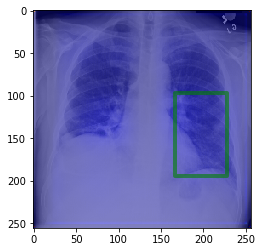

Prediction mask scale: 3.2346828e-23 - 0.43807477
Prediction string: 
Ground truth boxes: []
Average precision image: 00nan


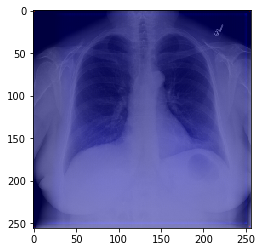

Prediction mask scale: 3.2292457e-23 - 0.41926387
Prediction string: 0.09809985 21 79 82 149 0.10211413 140 99 51 111
Ground truth boxes: [[127, 169, 61, 84], [12, 120, 78, 111]]
Average precision image: 0.16667


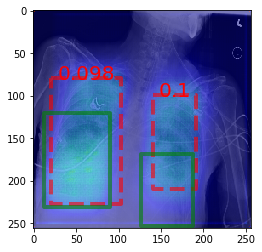

Prediction mask scale: 3.2646075e-23 - 0.43770102
Prediction string: 0.10541574 75 115 44 65
Ground truth boxes: []
Average precision image: 0.00000


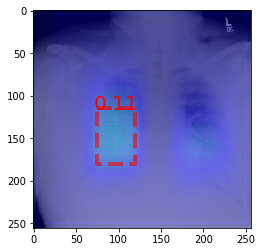

Prediction mask scale: 3.2407596e-23 - 0.43801627
Prediction string: 
Ground truth boxes: []
Average precision image: 00nan


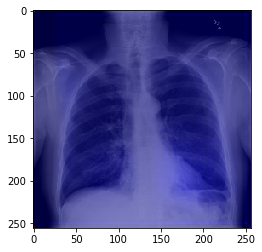

In [6]:
OUTPUT_PATH = 'output/UNET_SingleView_Baseline/1014-153224/outputs_data.pkl'

with open(OUTPUT_PATH, 'rb') as fh:
    rescale_factor, box_thresh, train_df, dev_dataset_for_predict, dev_pids, dev_predictions, min_box_area, boxes_by_pid_dict = pickle.load(fh)
print('Box thresh: {}'.format(box_thresh))
    
def visualize(dev_dataset_for_predict, i):
    img, pid = dev_dataset_for_predict[i]
    target_boxes = [rescale_box_coordinates(box, rescale_factor) for box in boxes_by_pid_dict[pid]] if pid in boxes_by_pid_dict else []
    prediction = dev_predictions[pid]
    predicted_boxes, confidences = parse_boxes(prediction, threshold=box_thresh, min_box_area=min_box_area*0.8, connectivity=None)
    avg_img_precision = average_image_precision(predicted_boxes, confidences, target_boxes, img_dim=img[0].shape[0])
    
    plt.imshow(img[0], cmap=mpl.cm.gist_gray)
    plt.imshow(prediction[0], cmap=mpl.cm.jet, alpha=0.5)
    draw_boxes(predicted_boxes, confidences, target_boxes, plt.gca())
    print('Prediction mask scale:', prediction[0].min(), '-', prediction[0].max())
    print('Prediction string:', prediction_output(predicted_boxes, confidences))
    print('Ground truth boxes:', target_boxes)
    print('Average precision image: {:05.5f}'.format(avg_img_precision))
    plt.show()
    
for i in random.sample(range(1, 100), 5):
    visualize(dev_dataset_for_predict, i)

Prediction mask scale: 3.2409943e-23 - 0.43783525
Prediction string: 
Ground truth boxes: []
Average precision image: 00nan


/nfs01/shared_software/anaconda3/envs/gia/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


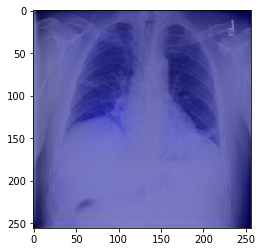

Prediction mask scale: 3.2238792e-23 - 0.43578684
Prediction string: 0.11806647 34 45 74 128 0.109937936 138 57 65 127
Ground truth boxes: [[146, 104, 51, 101], [55, 75, 50, 99]]
Average precision image: 0.20833


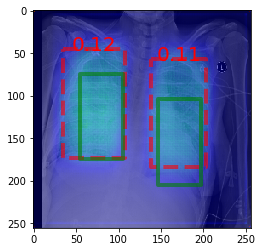

Prediction mask scale: 3.2387574e-23 - 0.4325639
Prediction string: 
Ground truth boxes: []
Average precision image: 00nan


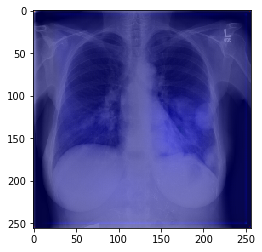

Prediction mask scale: 3.2401414e-23 - 0.43206325
Prediction string: 0.115836754 148 47 68 147 0.12480439 62 51 63 128
Ground truth boxes: [[77, 52, 45, 108], [150, 50, 58, 109]]
Average precision image: 0.62500


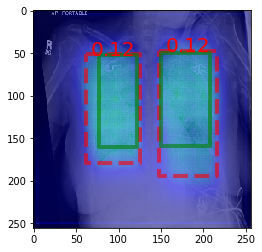

Prediction mask scale: 3.2408334e-23 - 0.43827912
Prediction string: 0.12357681 42 85 70 133 0.12314351 144 91 65 132
Ground truth boxes: [[47, 141, 42, 70], [154, 118, 49, 98]]
Average precision image: 0.16667


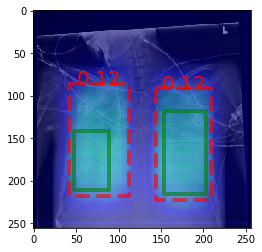

In [3]:
for i in random.sample(range(1, 100), 5):
    visualize(dev_dataset_for_predict, i)

Prediction mask scale: 3.2411553e-23 - 0.43476635
Prediction string: 
Ground truth boxes: []
Average precision image: 00nan


/nfs01/shared_software/anaconda3/envs/gia/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


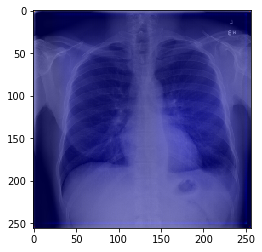

Prediction mask scale: 3.2394494e-23 - 0.43618926
Prediction string: 
Ground truth boxes: []
Average precision image: 00nan


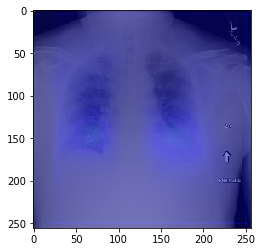

Prediction mask scale: 3.2394494e-23 - 0.43690717
Prediction string: 
Ground truth boxes: []
Average precision image: 00nan


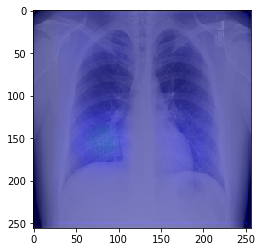

Prediction mask scale: 3.235386e-23 - 0.42941654
Prediction string: 
Ground truth boxes: []
Average precision image: 00nan


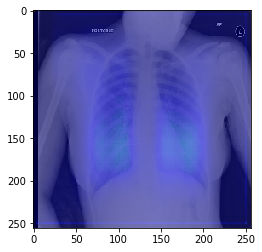

Prediction mask scale: 3.2398448e-23 - 0.43312296
Prediction string: 0.12289489 42 76 67 110 0.114908636 140 78 67 126
Ground truth boxes: []
Average precision image: 0.00000


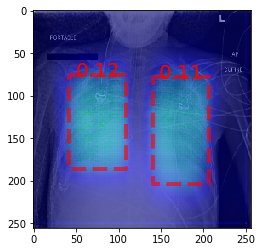

In [4]:
for i in random.sample(range(1, 100), 5):
    visualize(dev_dataset_for_predict, i)

Prediction mask scale: 3.2384608e-23 - 0.4355068
Prediction string: 0.108118296 55 83 51 83 0.10149735 97 83 10 13
Ground truth boxes: []
Average precision image: 0.00000


/nfs01/shared_software/anaconda3/envs/gia/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


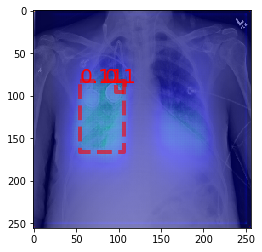

Prediction mask scale: 3.2632752e-23 - 0.43095747
Prediction string: 
Ground truth boxes: []
Average precision image: 00nan


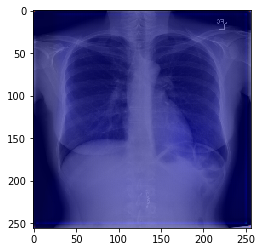

Prediction mask scale: 3.2406728e-23 - 0.43440494
Prediction string: 
Ground truth boxes: [[34, 37, 78, 168], [139, 49, 78, 105]]
Average precision image: 0.00000


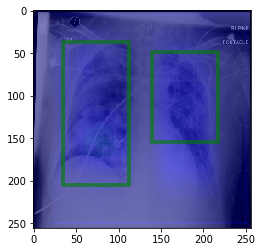

Prediction mask scale: 3.236003e-23 - 0.43824992
Prediction string: 0.11258049 52 107 59 69
Ground truth boxes: [[58, 122, 39, 32]]
Average precision image: 0.00000


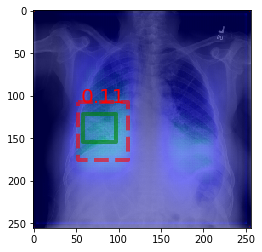

Prediction mask scale: 3.2302437e-23 - 0.43609598
Prediction string: 
Ground truth boxes: []
Average precision image: 00nan


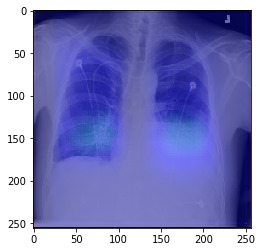

In [5]:
for i in random.sample(range(1, 100), 5):
    visualize(dev_dataset_for_predict, i)